# 適切なデータ区間でヒストグラムを作成し，データのバラつき方を把握する(2022/02/22)
---

## 概要
---

本notebookでは，データ集団の分布を把握するために用いるヒストグラムについて述べる．

ヒストグラムについて簡単に把握した後，Pythonを用いたシミュレーションを行う．

## ヒストグラム(Histogram)
---

ヒストグラムとは，横軸に階級，縦軸を度数としたグラフのことである．主に量的データの「バラツキ」を把握するために用いる．一例として，Pythonを用いたシミュレーションでは勤労者世帯の年間収入からヒストグラムを作成する．横軸に年間収入を切り分けた階級を作成し，それぞれの階級に含まれる世帯数を縦軸としてプロットする．

量的なデータからは平均値や中央値等の統計量を計算することができるが，それら単一の値からは把握しきれないデータの特徴を知ることができる．

またヒストグラムの形状によって，データそのものの性質の他，データ採取の際のミス・瑕疵に気づくことができるかもしれない．

## 階級の個数の選択
---

ヒストグラムを作成する際に問題となるのが，階級の個数の選択(階級幅の選択)である．適切に階級を決めなければ，ヒストグラムから誤った結論を導いてしまうかもしれない．もしくは，階級幅が狭すぎてデータの特徴をくみ取れないかもしれない(これは後のシミュレーションで試す)．

階級の個数を選択する指標としてはいくつか提案されているものがあるので，本節ではそれを紹介する．ただし，これらの指標は絶対的なものではなく，階級を選択するための画一的な目安は存在しないことに注意する．

ヒューリスティックには，階級の個数はおよそ5-10程度になれば良いとされている．

以下に紹介する指標では，階級の個数を$k$，階級幅を$h$として与える．

### 平方根選択(Square-root choice)

階級の個数として，データ数$N$の平方根をとるもの．

\begin{eqnarray}
k = \sqrt{N}
\end{eqnarray}

### スタージェスの公式(Sturges' formula)

\begin{eqnarray}
k = \lceil\log_2N+1\rceil
\end{eqnarray}

$N<30$(階級数が7未満)の場合，あるいは標本の分布が特殊な場合には適さないとされている．

### スコットの選択(Scott's choice)

\begin{eqnarray}
h = \frac{3.5\sigma}{N^{1/3}}
\end{eqnarray}

ここで$\sigma$は標本標準偏差を表す．

### フリードマン・ダイアコニスの選択(Freedman-Diaconis' choice)

\begin{eqnarray}
h = 2 \times \frac{IQR}{N^{1/3}}
\end{eqnarray}

ここで$IQR$は標本データの四分位範囲(InterQuartile Range)を表す．

### 階級幅の調整
基本的に階級幅$h$はどの階級でも等しくなるように設定するが，標本データによっては一部の階級幅を広くとるケースがある．階級の端に近づくにつれて，階級に属する標本数が少なくなっていくからである．その場合は，当該階級の度数を相対的に低くみなす．

例えば，ある階級の階級幅を他のものより4倍広くとった場合，その階級の度数に対してヒストグラムでは1/4の量で描画する．こうすることで，ヒストグラムを見たときに広い階級幅を持つ階級が他の階級と比較して高い度数を持っていると誤って解釈されないようにする．

具体的な事例として，総務省統計局が公開している[『家計調査年報(貯蓄・負債編)2020年』](https://www.stat.go.jp/data/sav/2020np/pdf/gy01.pdf)にある6ページのヒストグラムを見てほしい．少数派である貯蓄の多い世帯は階級幅が広く設定されている様子が確認できる．

## Pythonを用いたシミュレーション
---

本節では，Python(主にpandas)を利用して，実際にヒストグラムを描画するシミュレーションを行う．

対象データとして，今回は総務省統計局が実施している家計調査のうち，2020年[『年間収入階級別データ』](https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00200561&tstat=000000330001&cycle=7&year=20200&month=0&tclass1=000000330001&tclass2=000000330004&tclass3=000000330005&stat_infid=000032048815&result_back=1&tclass4val=0)を利用する．全国の二人以上の世帯に対して，年間収入で階級を設定し，世帯数を度数としてヒストグラムを作成する．

In [1]:
# データの読み込み
import pandas as pd

df = pd.read_excel('income2020.xlsx', '二人・全国', header=8, index_col='用途分類', usecols="L:AF")
df.dropna(inplace=True)
df

,単位,平均,200万円未満,200～250万円,250～300万円,300～350万円,350～400万円,400～450万円,450～500万円,500～550万円,550～600万円,600～650万円,650～700万円,700～750万円,750～800万円,800～900万円,"900～1,000万円","1,000～1,250万円","1,250～1,500万円","1,500万円以上"
用途分類,,,,,,,,,,,,,,,,,,,,
世帯数分布(抽出率調整),"10,000分比",10000,314,443,726,872,777,706,721,610,541,531,482,475,374,629,502,693,294,311
集計世帯数,世帯,7504,277,354,575,687,607,536,518,468,401,396,362,341,276,452,355,490,205,206
世帯人員,人,2.95,2.26,2.43,2.37,2.41,2.51,2.81,2.84,3.08,3.14,3.15,3.25,3.31,3.26,3.36,3.4,3.49,3.47,3.41
18歳未満人員,人,0.56,0.17,0.2,0.13,0.17,0.23,0.46,0.51,0.73,0.69,0.77,0.81,0.88,0.79,0.87,0.86,0.9,0.81,0.72
65歳以上人員,人,0.85,1.21,1.32,1.5,1.55,1.33,1.05,0.95,0.74,0.7,0.57,0.56,0.38,0.48,0.32,0.35,0.32,0.4,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
(再掲)情報通信関係費,円,17161,10291,10714,11930,13304,14524,16012,17110,18095,19179,19570,18517,19527,19841,20001,20735,21220,22643,21331
(再掲)消費支出(除く住居等)1),円,241482,129616,157394,167468,187559,198302,216534,217523,226713,246446,249140,263548,267126,261285,281991,309414,331228,369916,412414
エンゲル係数,％,27.5,32.3,31.6,32.2,30.3,28.9,28.9,28.4,28.9,28,27.4,26.2,26.6,26.4,26.1,25.5,24.9,24.5,24.1


In [2]:
# 世帯数の部分だけ取り出す
income_df = df.loc['集計世帯数','200万円未満':]
income_df

200万円未満          277
200～250万円        354
250～300万円        575
300～350万円        687
350～400万円        607
400～450万円        536
450～500万円        518
500～550万円        468
550～600万円        401
600～650万円        396
650～700万円        362
700～750万円        341
750～800万円        276
800～900万円        452
900～1,000万円      355
1,000～1,250万円    490
1,250～1,500万円    205
1,500万円以上        206
Name: 集計世帯数, dtype: object

<AxesSubplot:>

/home/ksekine/PROJECTS/DataScienceSkillApprentice/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19975 (\N{CJK UNIFIED IDEOGRAPH-4E07}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ksekine/PROJECTS/DataScienceSkillApprentice/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20870 (\N{CJK UNIFIED IDEOGRAPH-5186}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ksekine/PROJECTS/DataScienceSkillApprentice/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26410 (\N{CJK UNIFIED IDEOGRAPH-672A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ksekine/PROJECTS/DataScienceSkillApprentice/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28288 (\N{CJK UNIFIED IDEOGRAPH-6E80}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ksekine/PROJECTS/DataScien

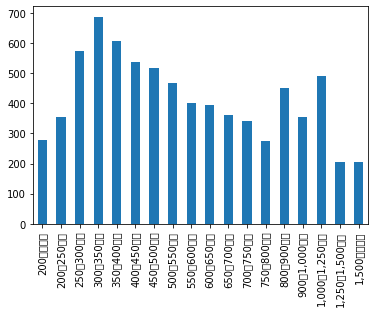

In [3]:
# 日本語豆腐を解決しておきたい(もしくはindexを上書きするか)
income_df.plot.bar()

https://www.stat.go.jp/naruhodo/4_graph/shokyu/histogram.html

https://ja.wikipedia.org/wiki/%E3%83%92%E3%82%B9%E3%83%88%E3%82%B0%E3%83%A9%E3%83%A0

https://bellcurve.jp/statistics/course/1639.html

https://www.stat.go.jp/data/sav/2020np/pdf/gy01.pdf

https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00200561&tstat=000000330001&cycle=7&year=20200&month=0&tclass1=000000330001&tclass2=000000330004&tclass3=000000330005&stat_infid=000032048815&result_back=1&tclass4val=0

https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

https://www.yutaka-note.com/entry/matplotlib_japanese#%E4%BD%BF%E7%94%A8%E3%81%A7%E3%81%8D%E3%82%8B%E3%83%95%E3%82%A9%E3%83%B3%E3%83%88%E3%82%92%E7%A2%BA%E8%AA%8D